In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction
MDb is an internet movie database that hosts a collection of movie reviews. For this project, the aim is to employ a binary classification model to ascertain the sentiment of these reviews, categorizing them as either positive or negative. This approach involves constructing a Recurrent Neural Network (RNN) with stacked,(non)-sequential layers, designed specifically for this purpose. 
Dataset Source: The dataset for our model is accessible through Keras library.
**Source of dataset: Keras library**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
# Loading data
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


# Data Exploration

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

(25000,) (25000,) (25000,) (25000,)


Please note that there is no need to go through null values, duplicates,..etc since the data came from Keras cleaned. Also note that there are 88000 unique words.
The data is labled either 1 (positive) or 0 (negative) as you can see below.

In [5]:
# display the first 5 reviews and labels
for i in range(5):
    print("\033[1m" + "Review:" + "\033[0m", X_train[i])
    print("\033[1m" + "Label:" + "\033[0m", y_train[i])
    print("*"* 258)

Review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 1
*******************

**Transformation**

1641221/1641221 [==============================] - 0s 0us/step


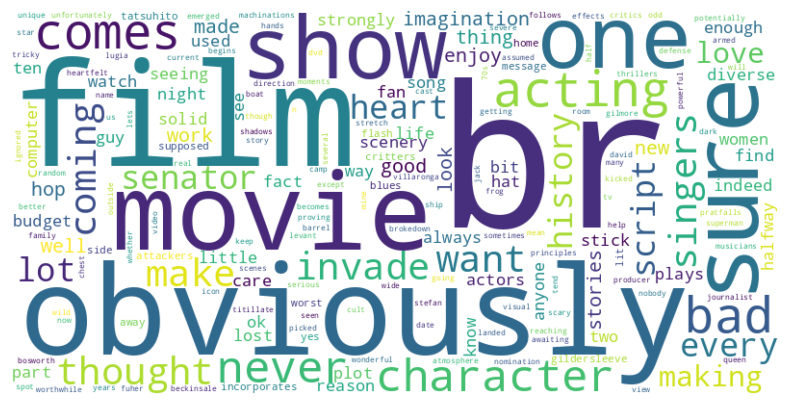

In [6]:
# Get the word index from the dataset
word_index = imdb.get_word_index()

# Reverse the word index to obtain a dict mapping index numbers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


# Function to decode reviews if they are encoded
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Concatenate the first N reviews
N = 5  # or however many reviews you want to include
text = ' '.join(decode_review(X_train[i]) for i in range(5))

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Plot image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

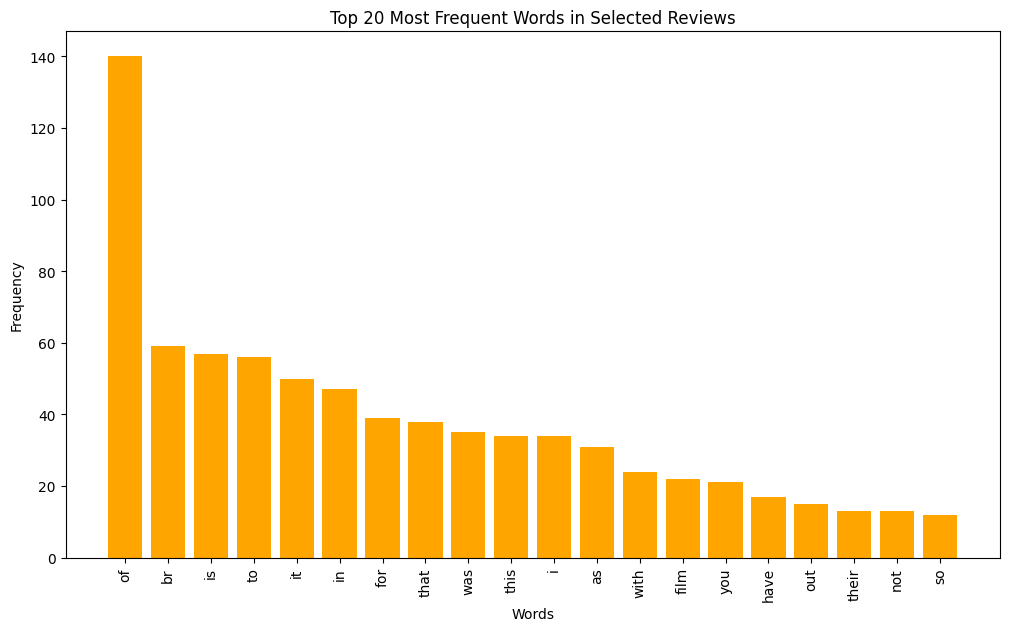

In [7]:
from collections import Counter
N = 10
text = ' '.join(decode_review(X_train[i]) for i in range(10))

# Split the text into words and calculate the frequency of each word
word_counts = Counter(text.split())

# Sort the words by descending frequency
common_words, common_counts = zip(*word_counts.most_common(20))
plt.figure(figsize=(10, 6))
indices = np.arange(len(common_words))
plt.bar(indices, common_counts, color='orange')
plt.xticks(indices, common_words, rotation='vertical')
plt.tight_layout()
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Selected Reviews')
plt.show()

The reviews in the IMDb dataset vary in word count, and our model requires samples of the same dimensions, we like to standardize the length of these reviews. To fix this, reviews longer than our specified limit will be truncated, while shorter ones will be padded with additional data to meet the required length. This process is efficiently handled by the pad_sequences utility function available in tensorflow.keras.preprocessing.sequence, ensuring uniformity in our data inputs.

# Building Neural Network
# Case 1
**RNN**

**Embedding Layer**

**Long Short Term Memory (LSTM) Layer**

**Dense Output Layer**

In [8]:
# Parameters for data preparation
word_per_review = 165

# Padding sequences to ensure uniform input size
X_train_padded = pad_sequences(X_train, maxlen=word_per_review)
X_test_padded = pad_sequences(X_test, maxlen=word_per_review)

In [9]:
# Splitting the test set into validation and test sets
# 20% of data used for validation
test_size_percentage = 0.2
# Seed for reproducibility
random_seed = 121  

X_test_final, X_val, y_test_final, y_val = train_test_split(
    X_test_padded, y_test, 
    test_size=test_size_percentage, 
    random_state=random_seed
)

In [10]:
# Parameters for the neural network
# maximum index value representing the vocabulary size
in_dim = max([max(sequence) for sequence in X_train_padded]) + 1  
# Dimension of embedding vector
out_dim = 256  
lstm_units = 256
# Adjust based on the number of output classes you expect; it's usually 1 for binary classification
dense_units = 1  

In [11]:
# Building the RNN (LSTM) model
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
rnn = Sequential()
rnn_model = Sequential([
    Embedding(input_dim=in_dim, output_dim=out_dim, input_length=word_per_review),
    LSTM(units=lstm_units, dropout=0.5, recurrent_dropout=0.5),
    Dense(units=dense_units, activation='sigmoid')  
])

**Compiling the model**

In [12]:
# Compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
rnn_model.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss ='binary_crossentropy',
    metrics=[SparseCategoricalAccuracy('accuracy')]
)
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 165, 256)          22678272  
                                                                 
 lstm (LSTM)                 (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 23203841 (88.52 MB)
Trainable params: 23203841 (88.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train and evaluate the model**

In [13]:
# Training the model
history = rnn_model.fit(
    X_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_val, y_val),  # Validate on the validation set
    shuffle=True
)

# Evaluate the model's performance on the test set
loss, accuracy = rnn_model.evaluate(X_test_final, y_test_final)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
782/782 [==============================] - 1048s 1s/step - loss: 0.6377 - accuracy: 0.5000 - val_loss: 0.4906 - val_accuracy: 0.4932
Epoch 2/10
782/782 [==============================] - 1037s 1s/step - loss: 0.4181 - accuracy: 0.5000 - val_loss: 0.4079 - val_accuracy: 0.4932
Epoch 3/10
782/782 [==============================] - 1037s 1s/step - loss: 0.3271 - accuracy: 0.5000 - val_loss: 0.3482 - val_accuracy: 0.4932
Epoch 4/10
782/782 [==============================] - 1037s 1s/step - loss: 0.2724 - accuracy: 0.5000 - val_loss: 0.3488 - val_accuracy: 0.4932
Epoch 5/10
782/782 [==============================] - 1037s 1s/step - loss: 0.2319 - accuracy: 0.5000 - val_loss: 0.3178 - val_accuracy: 0.4932
Epoch 6/10
782/782 [==============================] - 1037s 1s/step - loss: 0.2041 - accuracy: 0.5000 - val_loss: 0.3482 - val_accuracy: 0.4932
Epoch 7/10
782/782 [==============================] - 1040s 1s/step - loss: 0.1793 - accuracy: 0.5000 - val_loss: 0.3408 - val_accuracy:

**Visualizing the accurracy and the loss**

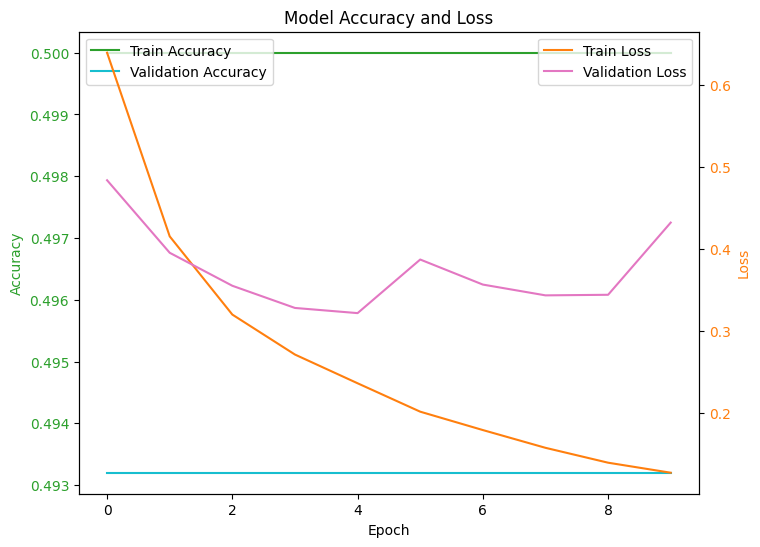

In [13]:
import matplotlib.pyplot as plt

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plotting training and validation accuracy on the left y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:green')
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='tab:green')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tab:cyan')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:orange')  
ax2.plot(history.history['loss'], label='Train Loss', color='tab:orange')
ax2.plot(history.history['val_loss'], label='Validation Loss', color='tab:pink')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.title('Model Accuracy and Loss')
plt.show()

**Using different metrics to evaluate the model**

In [14]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities
y_pred_probs = rnn_model.predict(X_test_final)
# Convert probabilities to binary class labels
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs.ravel()]

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test_final, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Compute F1-Score, Precision, and Recall
report = classification_report(y_test_final, y_pred, target_names=['Negative', 'Positive'])
print(report)

625/625 [==============================] - 93s 148ms/step
ROC-AUC Score: 0.9303087893696051
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86     10034
    Positive       0.86      0.85      0.86      9966

    accuracy                           0.86     20000
   macro avg       0.86      0.86      0.86     20000
weighted avg       0.86      0.86      0.86     20000



# Improving the model
# Case 2
**adding more layers to the neural network**

In [15]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
rnn_model = Sequential([
    Embedding(input_dim=in_dim, output_dim=out_dim, input_length=word_per_review),
    Bidirectional(LSTM(units=lstm_units, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)),
    LSTM(units=lstm_units, dropout=0.5, recurrent_dropout=0.5),
    Dense(units=128, activation='relu'),  # Additional dense layer with relu activation
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(units=dense_units, activation='sigmoid')  # Output layer for binary classification
])

In [16]:
# compile the model
rnn_model.compile(
    optimizer=Adam(learning_rate=3e-5),
    loss ='binary_crossentropy',
    metrics=[SparseCategoricalAccuracy('accuracy')]
)
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 165, 256)          22678272  
                                                                 
 bidirectional (Bidirection  (None, 165, 512)          1050624   
 al)                                                             
                                                                 
 lstm_2 (LSTM)               (None, 256)               787456    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                      

In [17]:
# Training the model
history = rnn_model.fit(
    X_train_padded, 
    y_train, 
    epochs=10, 
    batch_size=32, 
    validation_data=(X_val, y_val),  # Validate on the validation set
    shuffle=True
)

# Evaluate the model's performance on the test set
loss, accuracy = rnn_model.evaluate(X_test_final, y_test_final)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/10
782/782 [==============================] - 2878s 4s/step - loss: 0.6115 - accuracy: 0.5000 - val_loss: 0.4031 - val_accuracy: 0.4932
Epoch 2/10
782/782 [==============================] - 2862s 4s/step - loss: 0.3552 - accuracy: 0.5000 - val_loss: 0.3413 - val_accuracy: 0.4932
Epoch 3/10
782/782 [==============================] - 2864s 4s/step - loss: 0.2706 - accuracy: 0.5000 - val_loss: 0.3315 - val_accuracy: 0.4932
Epoch 4/10
782/782 [==============================] - 2806s 4s/step - loss: 0.2187 - accuracy: 0.5000 - val_loss: 0.3802 - val_accuracy: 0.4932
Epoch 5/10
782/782 [==============================] - 2846s 4s/step - loss: 0.1798 - accuracy: 0.5000 - val_loss: 0.3786 - val_accuracy: 0.4932
Epoch 6/10
782/782 [==============================] - 2858s 4s/step - loss: 0.1533 - accuracy: 0.5000 - val_loss: 0.3802 - val_accuracy: 0.4932
Epoch 7/10
782/782 [==============================] - 2830s 4s/step - loss: 0.1215 - accuracy: 0.5000 - val_loss: 0.4352 - val_accuracy:

In [19]:
# Predict probabilities
from sklearn.metrics import classification_report, roc_auc_score
y_pred_probs = rnn_model.predict(X_test_final)
# Convert probabilities to binary class labels
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs.ravel()]

# Compute ROC-AUC
roc_auc = roc_auc_score(y_test_final, y_pred_probs)
print(f"ROC-AUC Score: {roc_auc}")

# Compute F1-Score, Precision, and Recall
report = classification_report(y_test_final, y_pred, target_names=['Negative', 'Positive'])
print(report)

625/625 [==============================] - 337s 539ms/step
ROC-AUC Score: 0.928463408036997
              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     10034
    Positive       0.85      0.85      0.85      9966

    accuracy                           0.85     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.85      0.85      0.85     20000



# Findings and Conclusion
The results indicate that even with the addition of more layers, the test accuracy of your model has not improved and remains the same. The test loss has increased from 0.399 to 0.611, which is not a desirable outcome. Therefore, there is no need to add more layers to the RNN simply stick to case one.
However, when we used different evaluation metrics, the model ROC-AUC score was 0.9303, which is quite high. ROC-AUC (Receiver Operating Characteristic - Area Under Curve). This score suggests that the RNN model does an excellent job in distinguishing between positive and negative reviews.
Finaly, the RNN model performs well on this sentiment analysis task. The high ROC-AUC score suggests excellent capability in distinguishing between classes. The precision, recall, and F1-scores indicate that the model is well balanced in its ability to correctly identify negative and positive reviews while minimizing negatives and false positives. The accuracy of 86% is good for such a complex task. This overall performance suggests that the model is well-tuned for this task.
